<a href="https://colab.research.google.com/github/suribheemaraju/Fahion-MNIST-Data-Classification/blob/main/AI_INT_SURI_BHEEMARAJU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Data Classification Project



#Step_01: Import Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

#Step_02: Load the Data

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() 

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of data

In [ ]:
X_train.shape,y_train.shape,"**************",X_test.shape,y_test.shape  

((60000, 28, 28), (60000,), '**************', (10000, 28, 28), (10000,))

In [ ]:
X_train[6]        #show the all pixel values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[6]        #show the label value

7

In [ ]:
class_labels = [	"T-shirt/top",	"Trouser",	"Pullover",	"Dress",	"Coat",	"Sandal",	"Shirt",	"Sneaker",	"Bag",	"Ankle boot"]


In [ ]:
class_labels


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# show images

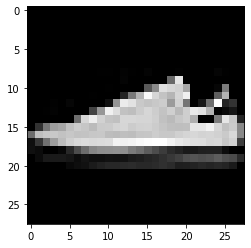

In [ ]:
plt.imshow(X_train[6],cmap='gray')

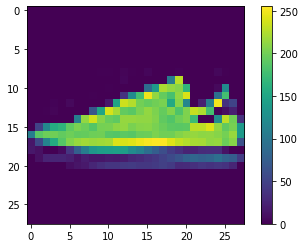

In [ ]:
# show the color image
plt.figure()
plt.imshow(X_train[6])
plt.colorbar()

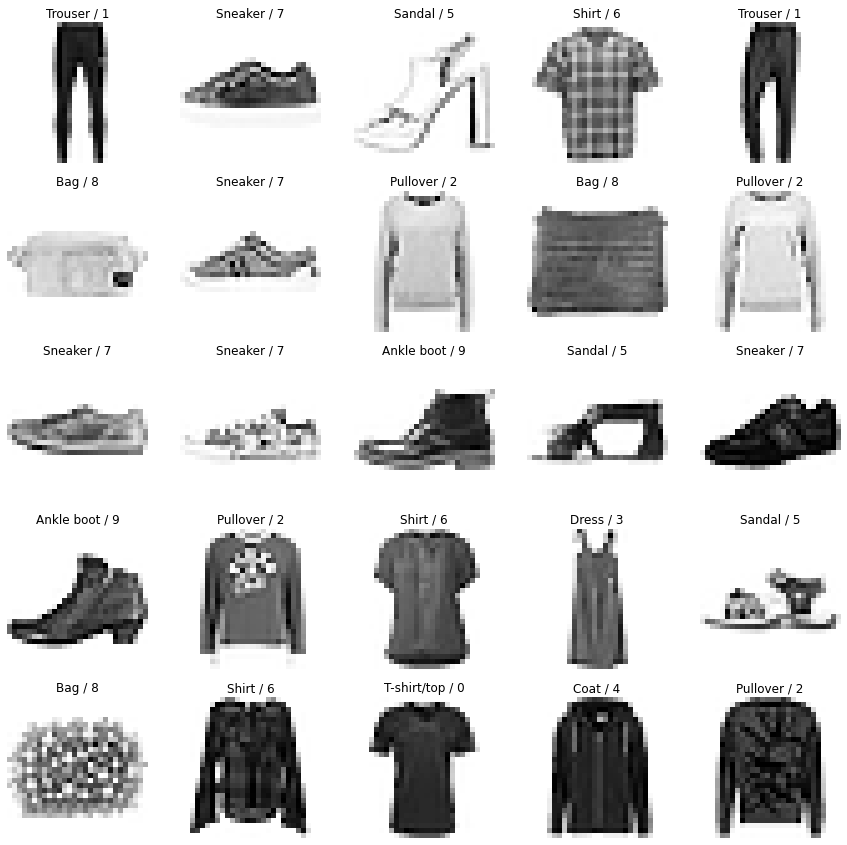

In [ ]:
# For showing the random images
plt.figure(figsize=(15,15))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i], cmap ='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
# change the dimention of an image 3D to 4D
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
# Feature scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[6]    #after devide X_train and X_text of pixes devided by one then we get less then values get so now easily do for computution now

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
# Split Dataset

In [ ]:
# split the dataset by using sklearn
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation = train_test_split(X_train,y_train,test_size=0.2,random_state=2022)    #here 0.2 means 20 % test

In [ ]:
# check it's split or not 
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((38400, 28, 28, 1), (9600, 28, 28, 1), (38400,), (9600,))

#step_04: Build a CNN(Convolutional Neural Network)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),    
    keras.layers.Flatten(),   
    keras.layers.Dense(units=128,activation='relu'),            
    keras.layers.Dense(units=10,activation='softmax')           

])


In [ ]:
model.summary()       #get the model data summery

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
# Compile the Model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the Model 
model.fit(X_train,y_train,epochs=15,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/15
75/75 [==============================] - 19s 243ms/step - loss: 0.6797 - accuracy: 0.7705 - val_loss: 0.4328 - val_accuracy: 0.8482
Epoch 2/15
75/75 [==============================] - 18s 236ms/step - loss: 0.3982 - accuracy: 0.8617 - val_loss: 0.3730 - val_accuracy: 0.8686
Epoch 3/15
75/75 [==============================] - 16s 219ms/step - loss: 0.3469 - accuracy: 0.8782 - val_loss: 0.3296 - val_accuracy: 0.8835
Epoch 4/15
75/75 [==============================] - 17s 220ms/step - loss: 0.3112 - accuracy: 0.8911 - val_loss: 0.3128 - val_accuracy: 0.8892
Epoch 5/15
75/75 [==============================] - 17s 221ms/step - loss: 0.2950 - accuracy: 0.8946 - val_loss: 0.3155 - val_accuracy: 0.8869
Epoch 6/15
75/75 [==============================] - 16s 220ms/step - loss: 0.2731 - accuracy: 0.9024 - val_loss: 0.2923 - val_accuracy: 0.8971
Epoch 7/15
75/75 [==============================] - 17s 229ms/step - loss: 0.2555 - accuracy: 0.9090 - val_loss: 0.2852 - val_accuracy: 0.9003

In [ ]:
# Predict values
y_pred= model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.96, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.14, 0.01, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Model Evalutate
score = model.evaluate(np.expand_dims(X_test, axis=3), y_test, batch_size=32)
print(score)

313/313 [==============================] - 2s 7ms/step - loss: 0.2750 - accuracy: 0.9021
[0.2750086188316345, 0.9021000266075134]


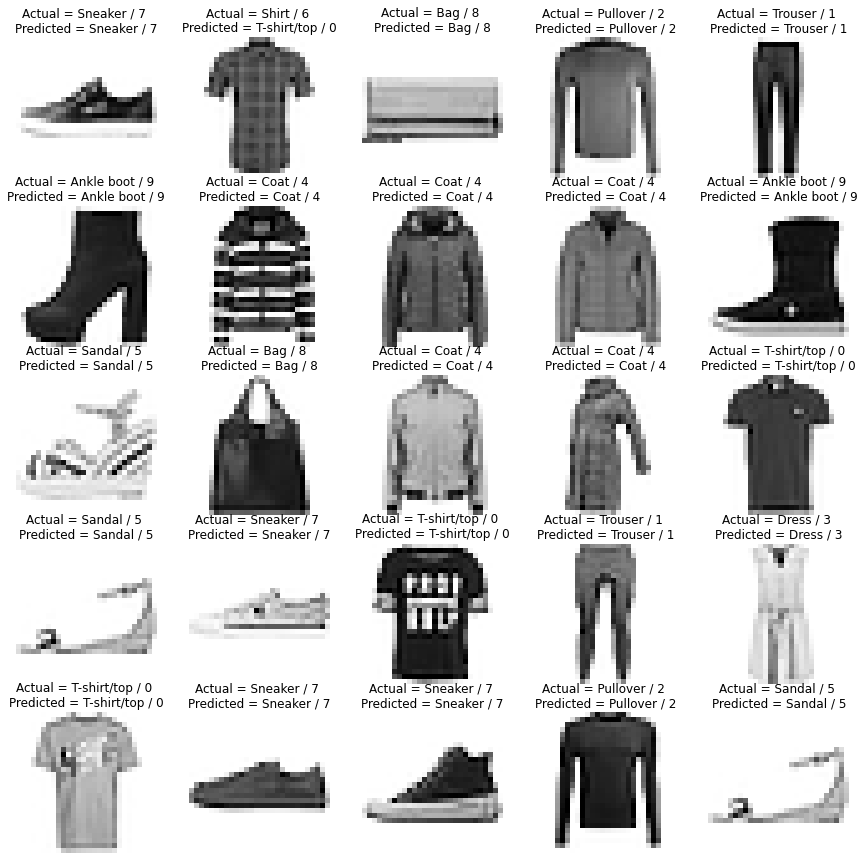

In [ ]:
# now check actual one and predict one after evaluate this
plt.figure(figsize=(15,15))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap ='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

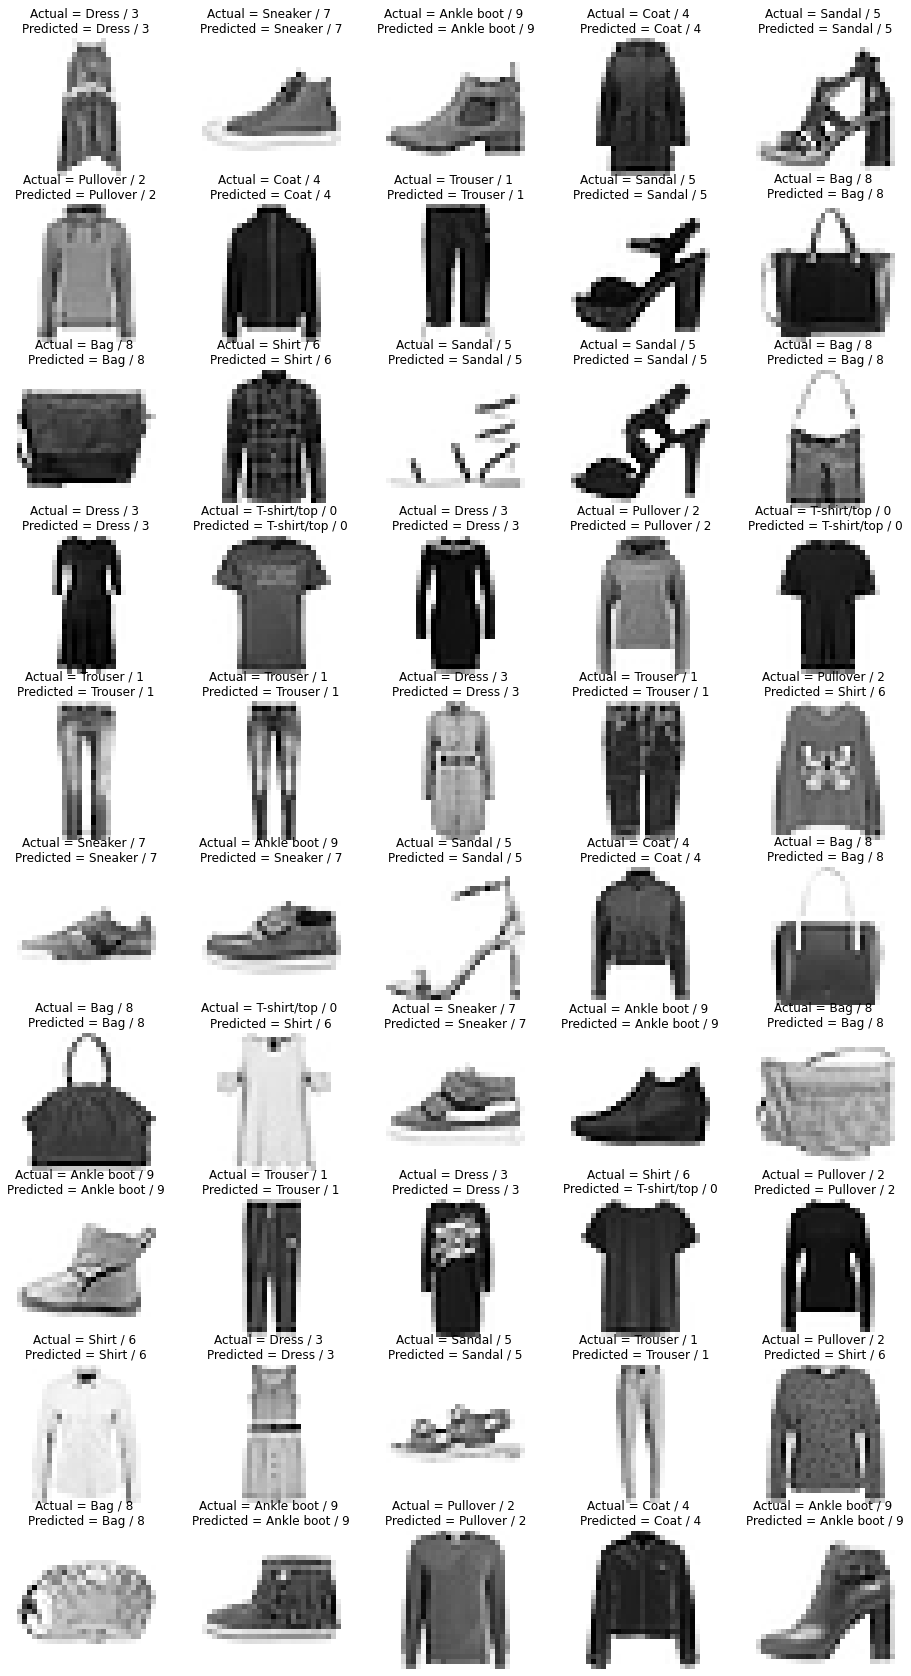

In [ ]:
# now check actual one and predict one after evaluate this
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(1000, 2000, 50):
  plt.subplot(10,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap ='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
''' ****Confusion Matrix****'''

' ****Confusion Matrix****'

In [ ]:
# take skleran lib and import confusion_matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels= [np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.85      0.83      0.84      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.76      0.69      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.99      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



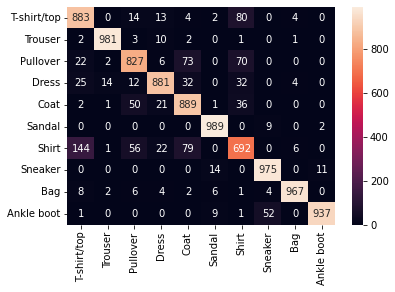

In [ ]:
# seborn library used to create heatmap to show the classification report for better understanding to show the clearance of an image
sns.heatmap(cm,annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred_labels, target_names = class_labels)
print(cr)


In [ ]:
'''****Saving the Model***'''

'****Saving the Model***'

In [ ]:
model.save('Fashion_MINST_CNN_Model.h5')

#Building 2 complex CNN Models

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))

cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
score = model.evaluate(np.expand_dims(X_test, axis=3), y_test, batch_size=32)
print(score)

Epoch 1/20
75/75 [==============================] - 23s 296ms/step - loss: 1.1384 - accuracy: 0.5772 - val_loss: 0.6306 - val_accuracy: 0.7566
Epoch 2/20
75/75 [==============================] - 22s 299ms/step - loss: 0.6134 - accuracy: 0.7687 - val_loss: 0.4885 - val_accuracy: 0.8117
Epoch 3/20
75/75 [==============================] - 20s 265ms/step - loss: 0.5023 - accuracy: 0.8134 - val_loss: 0.4361 - val_accuracy: 0.8370
Epoch 4/20
75/75 [==============================] - 20s 265ms/step - loss: 0.4438 - accuracy: 0.8372 - val_loss: 0.3937 - val_accuracy: 0.8530
Epoch 5/20
75/75 [==============================] - 20s 265ms/step - loss: 0.3991 - accuracy: 0.8553 - val_loss: 0.3645 - val_accuracy: 0.8644
Epoch 6/20
75/75 [==============================] - 20s 266ms/step - loss: 0.3733 - accuracy: 0.8636 - val_loss: 0.3338 - val_accuracy: 0.8803
Epoch 7/20
75/75 [==============================] - 21s 282ms/step - loss: 0.3513 - accuracy: 0.8700 - val_loss: 0.3345 - val_accuracy: 0.8744